<a href="https://colab.research.google.com/github/yunhyeongil/docs-l10n/blob/master/Predict_Future_Sales_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings



warnings.filterwarnings(action='ignore') # Ignore warning message

# date path
data_path = 'C:/Users/User/0_Project/kaggle/competitive-data-science-predict-future-sales/'

sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [ ]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% compressed'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [ ]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

62.5% compressed
38.6% compressed
54.2% compressed
39.9% compressed
70.8% compressed


In [ ]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.000000,1
1,03.01.2013,0,25,2552,899.000000,1
2,05.01.2013,0,25,2552,899.000000,-1
3,06.01.2013,0,25,2554,1709.050049,1
4,15.01.2013,0,25,2555,1099.000000,1


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [ ]:
print(np.shape(sales_train))
print(np.shape(test))

(2935849, 6)
(214200, 3)


In [ ]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
sum(sales_train.duplicated()), sum(test.duplicated()),sum(shops.duplicated()), sum(items.duplicated())

(6, 0, 0, 0)

In [ ]:
sum(item_categories.duplicated()), sum(test.duplicated())

(0, 0)

In [ ]:
sales_train[sales_train.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1
1435367,23.02.2014,13,50,3423,999.0,1
1496766,23.03.2014,14,21,3423,999.0,1
1671873,01.05.2014,16,50,3423,999.0,1
1866340,12.07.2014,18,25,3423,999.0,1
2198566,31.12.2014,23,42,21619,499.0,1


In [ ]:
sales_train.drop_duplicates(inplace = True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

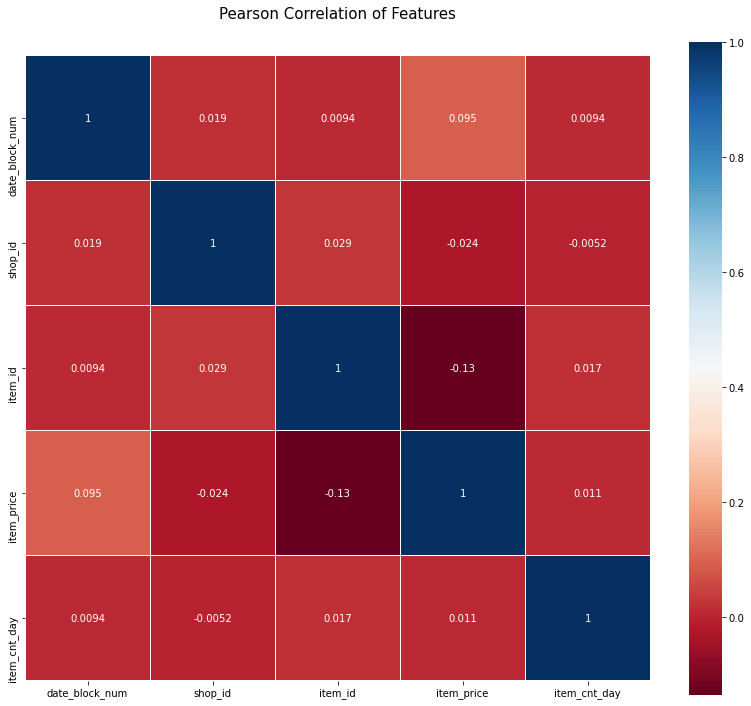

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(sales_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot:xlabel='item_cnt_day'>

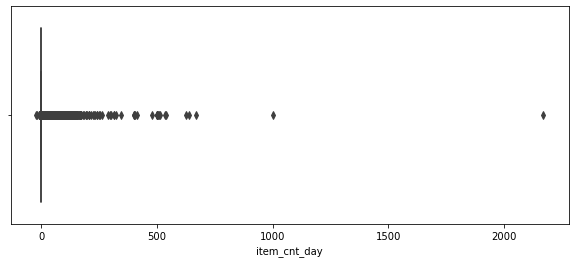

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_cnt_day)

<AxesSubplot:xlabel='item_price'>

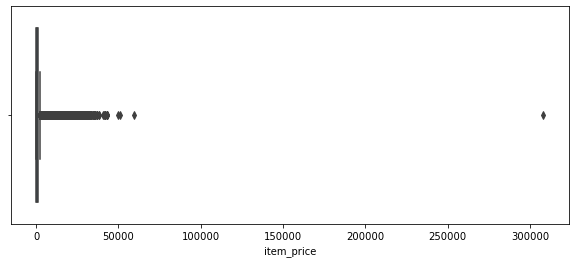

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_price)

In [ ]:
# sns Theme 
sns.set_style('darkgrid') 

# 소수점 표현 제한
pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))

In [ ]:
train_df = pd.DataFrame(sales_train)
train_df.describe(include="all")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935843,2935843.000,2935843.000,2935843.000,2935843.000,2935843.000
unique,1034,nan,nan,nan,nan,nan
top,28.12.2013,nan,nan,nan,nan,nan
freq,9434,nan,nan,nan,nan,nan
mean,NaN,14.570,33.002,10197.229,890.624,1.243
std,NaN,9.423,16.227,6324.293,1726.442,2.619
min,NaN,0.000,0.000,0.000,-1.000,-22.000
25%,NaN,7.000,22.000,4476.000,249.000,1.000
50%,NaN,14.000,31.000,9343.000,399.000,1.000
75%,NaN,23.000,47.000,15684.000,999.000,1.000


In [ ]:
sales_train = sales_train[sales_train['item_price'] > 0]
sales_train = sales_train[sales_train['item_price'] < 50000]
sales_train = sales_train[sales_train['item_cnt_day']>0]
sales_train = sales_train[sales_train['item_cnt_day']<1000]

<AxesSubplot:xlabel='item_cnt_day'>

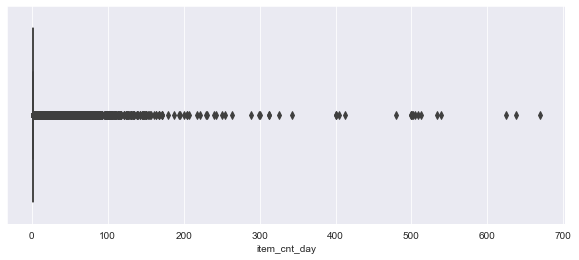

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_cnt_day)

<AxesSubplot:xlabel='item_price'>

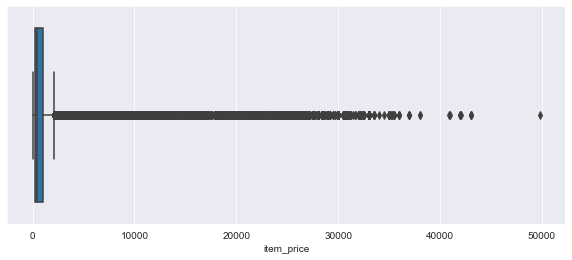

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x=sales_train.item_price)

### 2.3 데이터 통일성 확인
#### 여기서 이제 데이터를 이해하고 전체적인 값을 확인하는 것이 중요하다. 몇가지 작업을 해야한다. 현재 #### train 데이터에서 shop_id와 shop_name이 일치하지 않는 부분이 있다.

In [ ]:

print(shops['shop_name'][0], '||', shops['shop_name'][57])
print(shops['shop_name'][1], '||', shops['shop_name'][58])
print(shops['shop_name'][10], '||', shops['shop_name'][11])
print(shops['shop_name'][39], '||', shops['shop_name'][40])

#  Modify shop_id in sales_train data
sales_train.loc[sales_train['shop_id'] == 0, 'shop_id'] = 57
sales_train.loc[sales_train['shop_id'] == 1, 'shop_id'] = 58
sales_train.loc[sales_train['shop_id'] == 10, 'shop_id'] = 11
sales_train.loc[sales_train['shop_id'] == 39, 'shop_id'] = 40

#  Modify shop_id in test data
test.loc[test['shop_id'] == 0, 'shop_id'] = 57
test.loc[test['shop_id'] == 1, 'shop_id'] = 58
test.loc[test['shop_id'] == 10, 'shop_id'] = 11
test.loc[test['shop_id'] == 39, 'shop_id'] = 40

!Якутск Орджоникидзе, 56 фран || Якутск Орджоникидзе, 56
!Якутск ТЦ "Центральный" фран || Якутск ТЦ "Центральный"
Жуковский ул. Чкалова 39м? || Жуковский ул. Чкалова 39м²
РостовНаДону ТРК "Мегацентр Горизонт" || РостовНаДону ТРК "Мегацентр Горизонт" Островной


In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
# Leaking to imporve performance
unique_test_shop_id = test['shop_id'].unique()
sales_train = sales_train[sales_train['shop_id'].isin(unique_test_shop_id)]

shops['city'] = shops['shop_name'].apply(lambda x: x.split()[0])
shops['city'].unique()

shops.loc[shops['city'] =='!Якутск', 'city'] = 'Якутск'


In [ ]:
shops.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create Label Encoder
label_encoder = LabelEncoder()
# City Feature Label Encoding 
shops['city'] = label_encoder.fit_transform(shops['city'])
# Remove shop_name feature
shops = shops.drop('shop_name', axis=1)

shops.head()


,shop_id,city
0,0,29
1,1,29
2,2,0
3,3,1
4,4,2


In [ ]:
# Remove item_name feature
items = items.drop(['item_name'], axis=1)
# Create the date the product was first sold as a feature
items['first_sale_date'] = sales_train.groupby('item_id').agg({'date_block_num': 'min'})['date_block_num']

items.head()
items[items['first_sale_date'].isna()]

# Replace NaN of first_sale_date with 34 첫번째 팔린 날짜
items['first_sale_date'] = items['first_sale_date'].fillna(34)

In [ ]:
sales_train.groupby('item_id').agg({'date_block_num': 'min'})

,date_block_num
item_id,
1,15
16,20
17,20
18,19
19,0
...,...
22165,7
22166,9
22167,8


In [ ]:

# Extract the first word of the item_categories_name into category
item_categories['category'] = item_categories['item_category_name'].apply(lambda x: x.split()[0])  
item_categories['category'].value_counts()

def make_etc(x):
    if len(item_categories[item_categories['category']==x]) >= 5:
        return x
    else:
        return 'etc'

# Replace with 'etc' if category count is less than 5
item_categories['category'] = item_categories['category'].apply(make_etc)
item_categories.head()

# Create Label Encoder
label_encoder = LabelEncoder()
# Category Feature Label Encoding 
item_categories['category'] = label_encoder.fit_transform(item_categories['category'])

# Remove item_category_name feature
item_categories = item_categories.drop('item_category_name', axis=1)


In [ ]:
item_categories.head()

,item_category_id,category
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [ ]:
from itertools import product

train = []
# Create date_block_num, sop_id, item_id combination
for i in sales_train['date_block_num'].unique():
    all_shop = sales_train.loc[sales_train['date_block_num']==i, 'shop_id'].unique()
    all_item = sales_train.loc[sales_train['date_block_num']==i, 'item_id'].unique()
    train.append(np.array(list(product([i], all_shop, all_item))))
    

idx_features = ['date_block_num', 'shop_id', 'item_id'] # base features
train = pd.DataFrame(np.vstack(train), columns=idx_features)
group = sales_train.groupby(idx_features).agg({'item_cnt_day': 'sum',
                                               'item_price': 'mean'})
group = group.reset_index()
group = group.rename(columns={'item_cnt_day': 'item_cnt_month', 'item_price': 'item_price_mean'})

train = train.merge(group, on=idx_features, how='left')

train.head()


,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean
0,0,59,22154,1.000,999.000
1,0,59,2552,nan,nan
2,0,59,2554,nan,nan
3,0,59,2555,nan,nan
4,0,59,2564,nan,nan


In [ ]:
import gc

# group variable garbage collection
del group
gc.collect();
# Add a feature for the number of items sold
group = sales_train.groupby(idx_features).agg({'item_cnt_day': 'count'})
group = group.reset_index()
group = group.rename(columns={'item_cnt_day': 'item_count'})

train = train.merge(group, on=idx_features, how='left')

# Garbage collection
del group, sales_train
gc.collect()

train.head()

# Set test data date_block_num to 34
test['date_block_num'] = 34


# Concatenate train and test
all_data = pd.concat([train, test.drop('ID', axis=1)],
                     ignore_index=True,
                     keys=idx_features)
# Replace NaN with 0
all_data = all_data.fillna(0)

all_data.head()

# Merge other data
all_data = all_data.merge(shops, on='shop_id', how='left')
all_data = all_data.merge(items, on='item_id', how='left')
all_data = all_data.merge(item_categories, on='item_category_id', how='left')

# Data downcasting
all_data = downcast(all_data)

# Garbage collection
del shops, items, item_categories
gc.collect();

def resumetable(df):
    print(f'Data Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Dtypes'])
    summary['Null'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First_values'] = df.loc[0].values
    summary['Second_values'] = df.loc[1].values
    summary['Third_values'] = df.loc[2].values
    
    return summary
resumetable(all_data)



59.6% compressed
Data Shape: (8856961, 10)


,Dtypes,Null,Uniques,First_values,Second_values,Third_values
date_block_num,int8,0,35,0.000,0.000,0.000
shop_id,int8,0,42,59.000,59.000,59.000
item_id,int16,0,21464,22154.000,2552.000,2554.000
item_cnt_month,int16,0,407,1.000,0.000,0.000
item_price_mean,float32,0,34147,999.000,0.000,0.000
item_count,int8,0,40,1.000,0.000,0.000
city,int8,0,28,30.000,30.000,30.000
item_category_id,int8,0,84,37.000,58.000,58.000
first_sale_date,int8,0,35,0.000,0.000,0.000
category,int8,0,10,5.000,7.000,7.000


In [ ]:
all_data.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category
0,0,59,22154,1,999.000,1,30,37,0,5
1,0,59,2552,0,0.000,0,30,58,0,7
2,0,59,2554,0,0.000,0,30,58,0,7
3,0,59,2555,0,0.000,0,30,56,0,7
4,0,59,2564,0,0.000,0,30,59,0,7


In [ ]:
all_data.groupby('date_block_num').agg({'item_cnt_month': 'sum'})

,item_cnt_month
date_block_num,
0,100718.000
1,100207.000
2,114905.000
3,84189.000
4,85763.000
5,103566.000
6,94986.000
7,101691.000
8,107568.000


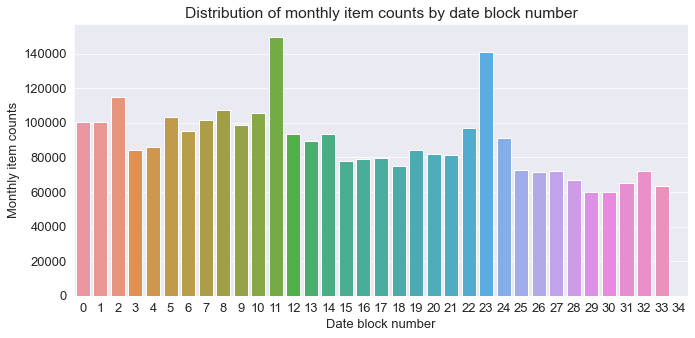

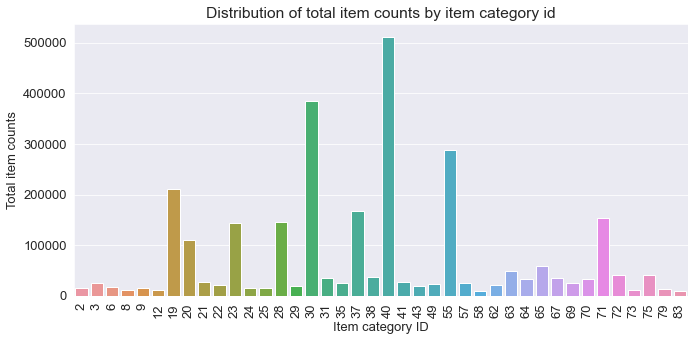

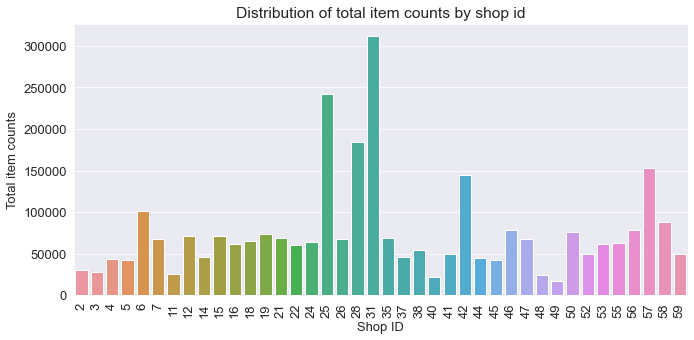

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=13)
figure, ax = plt.subplots() 
figure.set_size_inches(11, 5)

# total montly item sales
group_month_sum = all_data.groupby('date_block_num').agg({'item_cnt_month': 'sum'})
group_month_sum = group_month_sum.reset_index()

sns.barplot(x='date_block_num', y='item_cnt_month', data=group_month_sum)
ax.set(title='Distribution of monthly item counts by date block number',
       xlabel='Date block number', 
       ylabel='Monthly item counts');

figure, ax= plt.subplots() 
figure.set_size_inches(11, 5)

# Total item sales by item_category_id
group_cat_sum = all_data.groupby('item_category_id').agg({'item_cnt_month': 'sum'})
group_cat_sum = group_cat_sum.reset_index()

# Extract only item categories with total sales > 10,000
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_month'] > 10000]

sns.barplot(x='item_category_id', y='item_cnt_month', data=group_cat_sum)
ax.set(title='Distribution of total item counts by item category id',
       xlabel='Item category ID', 
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90) # Rotate X label

figure, ax= plt.subplots() 
figure.set_size_inches(11, 5)

# Total item sales by shop_id
group_shop_sum = all_data.groupby('shop_id').agg({'item_cnt_month': 'sum'})
group_shop_sum = group_shop_sum.reset_index()

group_shop_sum = group_shop_sum[group_shop_sum['item_cnt_month'] > 10000]

sns.barplot(x='shop_id', y='item_cnt_month', data=group_shop_sum)
ax.set(title='Distribution of total item counts by shop id',
       xlabel='Shop ID', 
       ylabel='Total item counts')
ax.tick_params(axis='x', labelrotation=90)

In [ ]:
#all_data, item_mean_features = add_mean_features(df=all_data,
#                                                 mean_features=item_mean_features,
#                                                 idx_features=['date_block_num', 'item_id'])

def add_mean_features(df, mean_features, idx_features):
    # Check base features
    assert (idx_features[0] == 'date_block_num') and \
           len(idx_features) in [2, 3]
    
    # Set derived feature name 
    if len(idx_features) == 2:
        feature_name = idx_features[1] + '_mean_sales'
    else:
        feature_name = idx_features[1] + '_' + idx_features[2] + '_mean_sales'
    
    # Get average monthly sales by grouping based on base features
    group = df.groupby(idx_features).agg({'item_cnt_month': 'mean'})
    group = group.reset_index()
    group = group.rename(columns={'item_cnt_month': feature_name})
    
    # Merge df with group based on idx_features
    df = df.merge(group, on=idx_features, how='left')
    # Date downcasting
    df = downcast(df, False)
    # Append newly created mean_feature_name features to the mean_features list
    mean_features.append(feature_name)
    # Garbage collection
    del group
    gc.collect()
    
    return df, mean_features

In [ ]:
all_data.describe()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category
count,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000
mean,16.019,31.019,11250.661,0.341,121.119,0.274,15.208,44.834,6.229,5.563
std,9.977,17.923,6216.085,3.387,661.657,1.008,8.358,15.272,8.508,1.826
min,0.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7.000,15.000,5859.000,0.000,0.000,0.000,9.000,37.000,0.000,5.000
50%,15.000,31.000,11344.000,0.000,0.000,0.000,13.000,40.000,1.000,5.000
75%,24.000,47.000,16533.000,0.000,0.000,0.000,22.000,55.000,11.000,7.000
max,34.000,59.000,22169.000,1644.000,49782.000,57.000,30.000,83.000,34.000,9.000


In [ ]:
# List of derived features containing 'item_id' in the grouping base features
item_mean_features = []


# Create monthly average sales derived features grouped by ['date_block_num', 'item_id']
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['date_block_num', 'item_id'])

In [ ]:
item_mean_features

['item_id_mean_sales']

In [ ]:
all_data.describe()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category,item_id_mean_sales
count,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000,8856961.000
mean,16.019,31.019,11250.661,0.341,121.119,0.274,15.208,44.834,6.229,5.563,0.330
std,9.977,17.923,6216.085,3.387,661.657,1.008,8.358,15.272,8.508,1.826,2.038
min,0.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7.000,15.000,5859.000,0.000,0.000,0.000,9.000,37.000,0.000,5.000,0.028
50%,15.000,31.000,11344.000,0.000,0.000,0.000,13.000,40.000,1.000,5.000,0.086
75%,24.000,47.000,16533.000,0.000,0.000,0.000,22.000,55.000,11.000,7.000,0.244
max,34.000,59.000,22169.000,1644.000,49782.000,57.000,30.000,83.000,34.000,9.000,267.868


In [ ]:
# Create monthly average sales derived features grouped by ['date_block_num', 'item_id', 'city']
all_data, item_mean_features = add_mean_features(df=all_data,
                                                 mean_features=item_mean_features,
                                                 idx_features=['date_block_num', 'item_id', 'city'])

item_mean_features


['item_id_mean_sales', 'item_id_city_mean_sales']

In [ ]:
# List of derived features containing 'shop_id' in the grouping base features
shop_mean_features = []

# Create monthly average sales derived features grouped by ['date_block_num', 'shop_id', 'item_category_id']
all_data, shop_mean_features = add_mean_features(df=all_data, 
                                                 mean_features=shop_mean_features,
                                                 idx_features=['date_block_num', 'shop_id', 'item_category_id'])
shop_mean_features

['shop_id_item_category_id_mean_sales']

In [ ]:
#all_data, lag_features_to_clip = add_lag_features(df=all_data, 
#                                                  lag_features_to_clip=lag_features_to_clip,
#                                                  idx_features=idx_features,
#                                                  lag_feature='item_cnt_month', 
#                                                  nlags=3,
#                                                  clip=True)



def add_lag_features(df, lag_features_to_clip, idx_features, 
                     lag_feature, nlags=3, clip=False):
    # Copy only the part of the DataFrame needed to create the lag features
    df_temp = df[idx_features + [lag_feature]].copy() 

    # Create lag features
    for i in range(1, nlags+1):
        # Lag featrue name -> 'item_cnt_month'
        lag_feature_name = lag_feature +'_lag' + str(i)
        # Set df_temp column name --> ['date_block_num', 'shop_id', 'item_id'] + item_cnt_month
        df_temp.columns = idx_features + [lag_feature_name]
        # Add 1 to date_block_num feature in df_temp
        df_temp['date_block_num'] += i
       
        
        # Merge df with df_temp based on idx_feature
        df = df.merge(df_temp.drop_duplicates(), 
                      on=idx_features, 
                      how='left')
        # Replace NaN with 0
        df[lag_feature_name] = df[lag_feature_name].fillna(0)
        # Add lag features to lag_features_to_clip to clip between 0 and 20
        if clip: 
            lag_features_to_clip.append(lag_feature_name)
    # Date downcasting
    df = downcast(df, False)
    # Garbage collection
    del df_temp
    gc.collect()
    
    return df, lag_features_to_clip

In [ ]:
#idx_features = ['date_block_num', 'shop_id', 'item_id']

lag_features_to_clip = [] # list of lag features to be clipped to between 0 to 20 
idx_features = ['date_block_num', 'shop_id', 'item_id'] # base features
# Create 3 month lag features of item_cnt_month based on idx_features

all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='item_cnt_month', 
                                                  nlags=3,
                                                  clip=True)
all_data.head().T

lag_features_to_clip

['item_cnt_month_lag1', 'item_cnt_month_lag2', 'item_cnt_month_lag3']

In [ ]:
all_data.head().T

,0,1,2,3,4
date_block_num,0.000,0.000,0.000,0.000,0.000
shop_id,59.000,59.000,59.000,59.000,59.000
item_id,22154.000,2552.000,2554.000,2555.000,2564.000
item_cnt_month,1.000,0.000,0.000,0.000,0.000
item_price_mean,999.000,0.000,0.000,0.000,0.000
item_count,1.000,0.000,0.000,0.000,0.000
city,30.000,30.000,30.000,30.000,30.000
item_category_id,37.000,58.000,58.000,56.000,59.000
first_sale_date,0.000,0.000,0.000,0.000,0.000
category,5.000,7.000,7.000,7.000,7.000


In [ ]:
item_mean_features

['item_id_mean_sales', 'item_id_city_mean_sales']

In [ ]:
# Create 3 month lag features of item_count feature based on idx_features
all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='item_count', 
                                                  nlags=3)

# Create 3 month lag features of item_price_mean feature based on idx_features
all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                  lag_features_to_clip=lag_features_to_clip,
                                                  idx_features=idx_features,
                                                  lag_feature='item_price_mean', 
                                                  nlags=3)
X_test_temp = all_data[all_data['date_block_num'] == 34]
X_test_temp[item_mean_features].sum()

item_id_mean_sales        0.000
item_id_city_mean_sales   0.000
dtype: float32

In [ ]:
X_test_temp[item_mean_features]

,item_id_mean_sales,item_id_city_mean_sales
8642761,0.000,0.000
8642762,0.000,0.000
8642763,0.000,0.000
8642764,0.000,0.000
8642765,0.000,0.000
...,...,...
8856956,0.000,0.000
8856957,0.000,0.000
8856958,0.000,0.000
8856959,0.000,0.000


In [ ]:
# Create lag features by item_mean_features element based on dx_features
for item_mean_feature in item_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data, 
                                                      lag_features_to_clip=lag_features_to_clip, 
                                                      idx_features=idx_features, 
                                                      lag_feature=item_mean_feature, 
                                                      nlags=3)
# Remove features in item_mean_features
all_data = all_data.drop(item_mean_features, axis=1)
shop_mean_features

['shop_id_item_category_id_mean_sales']

In [ ]:
# Create lag features by shop_mean_features element based on ['date_block_num', 'shop_id', 'item_category_id']
for shop_mean_feature in shop_mean_features:
    all_data, lag_features_to_clip = add_lag_features(df=all_data,
                                                      lag_features_to_clip=lag_features_to_clip, 
                                                      idx_features=['date_block_num', 'shop_id', 'item_category_id'], 
                                                      lag_feature=shop_mean_feature, 
                                                      nlags=3)

In [ ]:
lag_features_to_clip

['item_cnt_month_lag1', 'item_cnt_month_lag2', 'item_cnt_month_lag3']

In [ ]:
all_data.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price_mean,item_count,city,item_category_id,first_sale_date,category,...,item_price_mean_lag3,item_id_mean_sales_lag1,item_id_mean_sales_lag2,item_id_mean_sales_lag3,item_id_city_mean_sales_lag1,item_id_city_mean_sales_lag2,item_id_city_mean_sales_lag3,shop_id_item_category_id_mean_sales_lag1,shop_id_item_category_id_mean_sales_lag2,shop_id_item_category_id_mean_sales_lag3
0,0,59,22154,1,999.000,1,30,37,0,5,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0,59,2552,0,0.000,0,30,58,0,7,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0,59,2554,0,0.000,0,30,58,0,7,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,59,2555,0,0.000,0,30,56,0,7,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0,59,2564,0,0.000,0,30,59,0,7,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
all_data[all_data['date_block_num'] < 3].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            827186, 827187, 827188, 827189, 827190, 827191, 827192, 827193,
            827194, 827195],
           dtype='int64', length=827196)

In [ ]:
# Remove features in shop_mean_features
all_data = all_data.drop(shop_mean_features, axis=1)
# Remove data less than date ID 3
all_data = all_data.drop(all_data[all_data['date_block_num'] < 3].index)

all_data['item_cnt_month_lag_mean'] = all_data[['item_cnt_month_lag1',
                                         'item_cnt_month_lag2', 
                                         'item_cnt_month_lag3']].mean(axis=1)

In [ ]:
all_data[['item_cnt_month_lag1', 'item_cnt_month_lag2', 'item_cnt_month_lag3','item_cnt_month']]

,item_cnt_month_lag1,item_cnt_month_lag2,item_cnt_month_lag3,item_cnt_month
827196,1,4,0,3
827197,5,6,0,3
827198,0,0,0,3
827199,1,0,0,1
827200,0,0,0,1
...,...,...,...,...
8856956,1,0,0,0
8856957,0,0,0,0
8856958,0,0,0,0
8856959,0,0,0,0


In [ ]:
all_data['date_block_num']

827196      3
827197      3
827198      3
827199      3
827200      3
           ..
8856956    34
8856957    34
8856958    34
8856959    34
8856960    34
Name: date_block_num, Length: 8029765, dtype: int8

In [ ]:
# Clip 0~20
all_data[lag_features_to_clip + ['item_cnt_month', 'item_cnt_month_lag_mean']] = all_data[lag_features_to_clip +['item_cnt_month', 'item_cnt_month_lag_mean']].clip(0, 20)
all_data['lag_grad1'] = all_data['item_cnt_month_lag1']/all_data['item_cnt_month_lag2']
all_data['lag_grad1'] = all_data['lag_grad1'].replace([np.inf, -np.inf], 
                                                        np.nan).fillna(0)

all_data['lag_grad2'] = all_data['item_cnt_month_lag2']/all_data['item_cnt_month_lag3']
all_data['lag_grad2'] = all_data['lag_grad2'].replace([np.inf, -np.inf], 
                                                        np.nan).fillna(0)
all_data['brand_new'] = all_data['first_sale_date'] == all_data['date_block_num']

all_data['duration_after_first_sale'] = all_data['date_block_num'] - all_data['first_sale_date']
all_data = all_data.drop('first_sale_date', axis=1)
all_data['month'] = all_data['date_block_num']%12
# Remove item_price_mean, item_count features
all_data = all_data.drop(['item_price_mean', 'item_count'], axis=1)
all_data = downcast(all_data, False) # Data downcasting
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8029765 entries, 827196 to 8856960
Data columns (total 31 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   date_block_num                            int8   
 1   shop_id                                   int8   
 2   item_id                                   int16  
 3   item_cnt_month                            int8   
 4   city                                      int8   
 5   item_category_id                          int8   
 6   category                                  int8   
 7   item_cnt_month_lag1                       int8   
 8   item_cnt_month_lag2                       int8   
 9   item_cnt_month_lag3                       int8   
 10  item_count_lag1                           int8   
 11  item_count_lag2                           int8   
 12  item_count_lag3                           int8   
 13  item_price_mean_lag1                      float32
 1

In [ ]:
all_data

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,category,item_cnt_month_lag1,item_cnt_month_lag2,item_cnt_month_lag3,...,item_id_city_mean_sales_lag3,shop_id_item_category_id_mean_sales_lag1,shop_id_item_category_id_mean_sales_lag2,shop_id_item_category_id_mean_sales_lag3,item_cnt_month_lag_mean,lag_grad1,lag_grad2,brand_new,duration_after_first_sale,month
827196,3,25,8092,3,13,40,5,1,4,0,...,0.000,1.087,1.049,0.000,1.667,0.250,0.000,0,3,3
827197,3,25,7850,3,13,30,3,5,6,0,...,0.000,3.654,2.279,0.000,3.667,0.833,0.000,0,3,3
827198,3,25,8051,3,13,66,8,0,0,0,...,0.000,1.828,1.389,0.000,0.000,0.000,0.000,0,3,3
827199,3,25,8088,1,13,55,7,1,0,0,...,0.000,0.600,0.562,0.000,0.333,0.000,0.000,0,3,3
827200,3,25,8089,1,13,55,7,0,0,0,...,0.000,0.600,0.562,0.000,0.000,0.000,0.000,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856956,34,45,18454,0,20,55,7,1,0,0,...,0.000,0.127,0.106,0.128,0.333,0.000,0.000,0,11,10
8856957,34,45,16188,0,20,64,8,0,0,0,...,0.000,0.094,0.220,0.102,0.000,0.000,0.000,0,2,10
8856958,34,45,15757,0,20,55,7,0,0,0,...,0.000,0.127,0.106,0.128,0.000,0.000,0.000,0,34,10
8856959,34,45,19648,0,20,40,5,0,0,0,...,0.000,0.084,0.112,0.083,0.000,0.000,0.000,0,11,10


In [ ]:
np.shape(all_data)

(8029765, 31)

In [ ]:
len(all_data[all_data['date_block_num'] == 33])

221718

In [ ]:
len(all_data[all_data['date_block_num'] == 34])

214200

In [ ]:
len(all_data[all_data['date_block_num'] == 34])

214200

In [ ]:
all_data

,date_block_num,shop_id,item_id,item_cnt_month,city,item_category_id,category,item_cnt_month_lag1,item_cnt_month_lag2,item_cnt_month_lag3,...,item_id_city_mean_sales_lag3,shop_id_item_category_id_mean_sales_lag1,shop_id_item_category_id_mean_sales_lag2,shop_id_item_category_id_mean_sales_lag3,item_cnt_month_lag_mean,lag_grad1,lag_grad2,brand_new,duration_after_first_sale,month
827196,3,25,8092,3,13,40,5,1,4,0,...,0.000,1.087,1.049,0.000,1.667,0.250,0.000,0,3,3
827197,3,25,7850,3,13,30,3,5,6,0,...,0.000,3.654,2.279,0.000,3.667,0.833,0.000,0,3,3
827198,3,25,8051,3,13,66,8,0,0,0,...,0.000,1.828,1.389,0.000,0.000,0.000,0.000,0,3,3
827199,3,25,8088,1,13,55,7,1,0,0,...,0.000,0.600,0.562,0.000,0.333,0.000,0.000,0,3,3
827200,3,25,8089,1,13,55,7,0,0,0,...,0.000,0.600,0.562,0.000,0.000,0.000,0.000,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856956,34,45,18454,0,20,55,7,1,0,0,...,0.000,0.127,0.106,0.128,0.333,0.000,0.000,0,11,10
8856957,34,45,16188,0,20,64,8,0,0,0,...,0.000,0.094,0.220,0.102,0.000,0.000,0.000,0,2,10
8856958,34,45,15757,0,20,55,7,0,0,0,...,0.000,0.127,0.106,0.128,0.000,0.000,0.000,0,34,10
8856959,34,45,19648,0,20,40,5,0,0,0,...,0.000,0.084,0.112,0.083,0.000,0.000,0.000,0,11,10


In [ ]:
# Train data (Features)
X_train = all_data[all_data['date_block_num'] < 33]
X_train = X_train.drop(['item_cnt_month'], axis=1)
# Valid data (Features)
X_valid = all_data[all_data['date_block_num'] == 33]
X_valid = X_valid.drop(['item_cnt_month'], axis=1)
# Test data (Features)
X_test = all_data[all_data['date_block_num'] == 34]
X_test = X_test.drop(['item_cnt_month'], axis=1)

# Train data (Target values)
y_train = all_data[all_data['date_block_num'] < 33]['item_cnt_month']
# Valid data (Target values)
y_valid = all_data[all_data['date_block_num'] == 33]['item_cnt_month']


## Models

### LightGBM

In [ ]:
import lightgbm as lgb

# lgb hyper-parameters
params = {'boosting_type': 'gbdt',
          'metric': 'rmse',
          'num_leaves': 255,
          'learning_rate': 0.005,
          'feature_fraction': 0.75,
          'bagging_fraction': 0.75,
          'bagging_freq': 5,
          'force_col_wise' : True,
          'random_state': 10}

cat_features = ['shop_id', 'city', 'item_category_id', 'category', 'month']

# lgb train and valid dataset
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)


# Train LightGBM model
lgb_model = lgb.train(params=params,
                     train_set=dtrain,
                     num_boost_round=1500,
                     valid_sets=(dtrain, dvalid),
                     early_stopping_rounds=150,
                     categorical_feature=cat_features,
                     verbose_eval=100)      

lgb_preds = lgb_model.predict(X_test).clip(0,20)

submission['item_cnt_month'] = lgb_preds
submission.to_csv('lgb_submission3.csv', index=False) # public score 0.86752


[LightGBM] [Info] Total Bins 3953
[LightGBM] [Info] Number of data points in the train set: 7593847, number of used features: 30
[LightGBM] [Info] Start training from score 0.307755
Training until validation scores don't improve for 150 rounds
[100]	training's rmse: 1.01919	valid_1's rmse: 0.913962
[200]	training's rmse: 0.914525	valid_1's rmse: 0.841499
[300]	training's rmse: 0.862187	valid_1's rmse: 0.812615
[400]	training's rmse: 0.833325	valid_1's rmse: 0.800856
[500]	training's rmse: 0.813941	valid_1's rmse: 0.797061
[600]	training's rmse: 0.800292	valid_1's rmse: 0.79638
[700]	training's rmse: 0.789909	valid_1's rmse: 0.795847
[800]	training's rmse: 0.781486	valid_1's rmse: 0.795461
[900]	training's rmse: 0.774332	valid_1's rmse: 0.795567
Early stopping, best iteration is:
[838]	training's rmse: 0.778768	valid_1's rmse: 0.795307


### Catboost

In [ ]:
!pip install catboost

In [ ]:
%%time
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

model_catboost = CatBoostRegressor(verbose=False, random_seed=566)


model_catboost.fit(X_train,y_train);
prediction_catboost = model_catboost.predict(X_valid)
print(mean_squared_error(y_valid, prediction_catboost, squared=False))

0.8097263823150711
Wall time: 12min 45s


In [ ]:
# prediction = model_catboost.predict(X_test)
# prediction_catboost = prediction

# submission = pd.DataFrame({
#     "ID": np.arange(prediction.shape[0]), 
#     "item_cnt_month": prediction.clip(0, 20)
# })
# submission.to_csv('submission_catboost.csv', index=False)

### Neural Network


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.regularizers import l2, l1
from keras.optimizers import RMSprop, Adam
#from tensorflow import set_random_seed
import tensorflow as tf    

np.random.seed(566)

# define model
def Sales_prediction_model(input_shape):
    in_layer = Input(input_shape)
    x = Dense(16,kernel_initializer='RandomUniform', kernel_regularizer=l2(0.02), activation = "relu")(in_layer)
    x = Dense(8, kernel_initializer='RandomUniform', kernel_regularizer=l2(0.02), activation = "relu")(x)
    x = Dense(1, kernel_initializer='RandomUniform', kernel_regularizer=l2(0.02), activation = "relu")(x)
    
    model = Model(inputs = in_layer, outputs = x, name='Sales_prediction_model')
    return model

# NN cannot take missing values, fill NaN with 0.
X_train.fillna(0,inplace=True)
X_valid.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

# We do no feature scaling here. 
# Some features like 'item_avg_sale_last_6' are already scaled in feature engineering part.

input_shape = [X_train.shape[1]]
model_nn = Sales_prediction_model(input_shape)
model_nn.compile(optimizer = Adam(lr=0.0005) , loss = ["mse"], metrics=['mse'])
model_nn.fit(X_train, y_train, validation_data = (X_valid, y_valid), batch_size = 10000, epochs=5)


prediction_nn = model_nn.predict(X_valid)
print(mean_squared_error(y_valid, prediction_nn, squared=False))

Epoch 1/5
760/760 [==============================] - 3s 4ms/step - loss: 1.3232 - mse: 1.2791 - val_loss: 0.9922 - val_mse: 0.9032
Epoch 2/5
760/760 [==============================] - 3s 4ms/step - loss: 1.1722 - mse: 1.0843 - val_loss: 0.8877 - val_mse: 0.8044
Epoch 3/5
760/760 [==============================] - 3s 3ms/step - loss: 1.1116 - mse: 1.0338 - val_loss: 0.8793 - val_mse: 0.8056
Epoch 4/5
760/760 [==============================] - 3s 4ms/step - loss: 1.1020 - mse: 1.0302 - val_loss: 0.9975 - val_mse: 0.9275
Epoch 5/5
760/760 [==============================] - 3s 4ms/step - loss: 1.1184 - mse: 1.0495 - val_loss: 1.0074 - val_mse: 0.9343
0.9665728


In [ ]:
# prediction = model_nn.predict(X_test)
# prediction_nn = prediction

# submission = pd.DataFrame({
#     "ID": np.arange(prediction.shape[0]), 
#     "item_cnt_month": prediction.clip(0, 20).flatten()
# })
# submission.to_csv('submission_nn.csv', index=False)

### Xgboost

In [ ]:
%%time
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    max_depth=7,
    n_estimators=1000,
    min_child_weight=300,   
    colsample_bytree=0.8, 
    subsample=0.8, 
    gamma = 0.005,
    eta=0.1,    
    seed=42)

model_xgb.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=10, 
    early_stopping_rounds = 40,
    )


prediction_xgb = model_xgb.predict(X_valid)
print(mean_squared_error(y_valid, prediction_xgb, squared=False))

[0]	validation_0-rmse:1.19354	validation_1-rmse:1.05909
[10]	validation_0-rmse:0.94115	validation_1-rmse:0.85285
[20]	validation_0-rmse:0.88877	validation_1-rmse:0.81810
[30]	validation_0-rmse:0.87349	validation_1-rmse:0.81087
[40]	validation_0-rmse:0.86626	validation_1-rmse:0.80794
[50]	validation_0-rmse:0.86106	validation_1-rmse:0.80803
[60]	validation_0-rmse:0.85716	validation_1-rmse:0.80711
[70]	validation_0-rmse:0.85366	validation_1-rmse:0.80612
[80]	validation_0-rmse:0.85072	validation_1-rmse:0.80655
[90]	validation_0-rmse:0.84808	validation_1-rmse:0.80637
[100]	validation_0-rmse:0.84555	validation_1-rmse:0.80649
[110]	validation_0-rmse:0.84372	validation_1-rmse:0.80483
[120]	validation_0-rmse:0.84107	validation_1-rmse:0.80603
[130]	validation_0-rmse:0.83920	validation_1-rmse:0.80564
[140]	validation_0-rmse:0.83802	validation_1-rmse:0.80592
[146]	validation_0-rmse:0.83691	validation_1-rmse:0.80618
0.80480874
Wall time: 20min 54s


In [ ]:
# prediction = model_xgb.predict(X_test)
# prediction_xgb = prediction

# submission = pd.DataFrame({
#     "ID": np.arange(prediction.shape[0]), 
#     "item_cnt_month": prediction.clip(0, 20)
# })
# submission.to_csv('submission_xgb.csv', index=False)

## Ensemble based on different models

### Meta features

In [ ]:
%%time
models = [lgb_model, model_catboost, model_nn, model_xgb] 

meta_X_train = [model.predict(X_valid) for model in models]

meta_X_train[2] = meta_X_train[2].flatten()

meta_X_train = np.array(meta_X_train).T

meta_X_test = [model.predict(X_test) for model in models]

meta_X_test[2] = meta_X_test[2].flatten()

meta_X_test = np.array(meta_X_test).T

meta_y_train = y_valid

Wall time: 21.8 s


### Simple convex mix

### Two models

In [ ]:
from sklearn.metrics import mean_squared_error

# choose models 
model_index = [0,1]  # lgbm and catboost score 0.793736
# model_index = [0,2] # lgbm and nn score 0.795300
# model_index = [0,-1]  # lgbm and xgb  score 0.794566

alphas_to_try = np.linspace(0, 1, 1001)
rmse_scores = np.empty_like(alphas_to_try)

for ind, alpha in enumerate(alphas_to_try):
    simple_mix_pred = alpha * meta_X_train[:,model_index[0]] + (1 - alpha) * meta_X_train[:,model_index[1]]
    rmse_scores[ind] = mean_squared_error(meta_y_train, simple_mix_pred, squared=False)


best_alpha = alphas_to_try[np.argmin(rmse_scores)]
rmse_train_simple_mix = np.min(rmse_scores) 

print('Best alpha: %f; Corresponding rmse score on train: %f' % (best_alpha, rmse_train_simple_mix))

Best alpha: 0.789000; Corresponding rmse score on train: 0.794566


In [ ]:
# remember that meta_X_test is a prediction for a model for X_test
meta_prediction = best_alpha * meta_X_test[:,model_index[0]] + (1 - best_alpha) * meta_X_test[:,model_index[1]]
submission = pd.DataFrame({
    "ID": np.arange(meta_prediction.shape[0]), 
    "item_cnt_month": meta_prediction.clip(0, 20).flatten()
})
submission.to_csv('submission_meta_simple_mix_lgbm_cat.csv', index=False) # public score 0.87196

### Three models

In [ ]:
%%time
from sklearn.metrics import mean_squared_error


alphas_to_try = np.linspace(0, 1, 51)
betas_to_try = np.linspace(0, 1, 51)
gammas_to_try = np.linspace(0, 1, 51)
rmse_scores = np.zeros((len(alphas_to_try), len(betas_to_try),len(gammas_to_try)))

for ind1, alpha in enumerate(alphas_to_try):
    for ind2, beta in enumerate(betas_to_try):  
        for ind3, gamma in enumerate(gammas_to_try):  
            simple_mix_pred = alpha * meta_X_train[:,0] + beta * meta_X_train[:,1] +  gamma * meta_X_train[:,3]
            rmse_scores[ind1, ind2, ind3] = mean_squared_error(meta_y_train, simple_mix_pred, squared=False)


ind1, ind2, ind3 = np.unravel_index(rmse_scores.argmin(), rmse_scores.shape)
best_alpha, best_beta, best_gamma = alphas_to_try[ind1], betas_to_try[ind2], gammas_to_try[ind3]
rmse_train_simple_mix = np.min(rmse_scores) 

print('Best alpha: %f; best beta: %f; best gamma: %f; Corresponding rmse score on train: %f' % (best_alpha, best_beta, best_gamma, rmse_train_simple_mix))

Best alpha: 0.660000; best beta: 0.220000; best gamma: 0.100000; Corresponding rmse score on train: 0.793357
Wall time: 10min 34s


In [ ]:
# remember that meta_X_test is a prediction for a model for X_test
meta_prediction = best_alpha * meta_X_test[:,0] + best_beta * meta_X_test[:,1] + best_gamma * meta_X_test[:,3]
submission = pd.DataFrame({
    "ID": np.arange(meta_prediction.shape[0]), 
    "item_cnt_month": meta_prediction.clip(0, 20).flatten()
})
submission.to_csv('submission_meta_simple_mix_3_models.csv', index=False) # public score 0.86896

## Stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

meta_model = LinearRegression()

meta_model.fit(meta_X_train, meta_y_train)

meta_prediction = meta_model.predict(meta_X_test)
print(mean_squared_error(meta_y_train, meta_model.predict(meta_X_train), squared=False))

0.7931353576919323


In [ ]:
submission = pd.DataFrame({
    "ID": np.arange(meta_prediction.shape[0]), 
    "item_cnt_month": meta_prediction.clip(0, 20).flatten()
})
submission.to_csv('submission_meta_lr_4_models.csv', index=False) # public score 0.87021